Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import re

Importing scraped dataset

In [9]:
dataset = pd.read_csv('comments.csv')
dataset = dataset.astype(str) #We convert all data to string data type

Delete lines with more characters than the character limit we set

In [10]:
char_limit = 95

removed_rows = dataset[dataset['comments'].str.len() > char_limit]

dataset = dataset[dataset['comments'].str.len() <= char_limit]


We delete non-English comments

In [11]:
from langdetect import detect , LangDetectException

def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

dataset['is_english'] = dataset['comments'].apply(is_english)

dataset = dataset[dataset['is_english'] == True]

dataset.head()

,comments,is_english
1,Tony would be very proud of Gaga 🥹,True
3,It's still hard to believe that we've gotten s...,True
5,I'm gonna listen to this every morning to star...,True
6,This song exudes broadway. I hope we actually ...,True
7,Mexico loves you Mother monster ️🇲🇽,True


Making sentiment analysis with VADER

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

dataset['sentiment'] = dataset['comments'].apply(sentiment_analyzer)

In [13]:
dataset.head()

,comments,is_english,sentiment
1,Tony would be very proud of Gaga 🥹,True,positive
3,It's still hard to believe that we've gotten s...,True,negative
5,I'm gonna listen to this every morning to star...,True,positive
6,This song exudes broadway. I hope we actually ...,True,positive
7,Mexico loves you Mother monster ️🇲🇽,True,positive


Create a pie chart of sentiment analysis

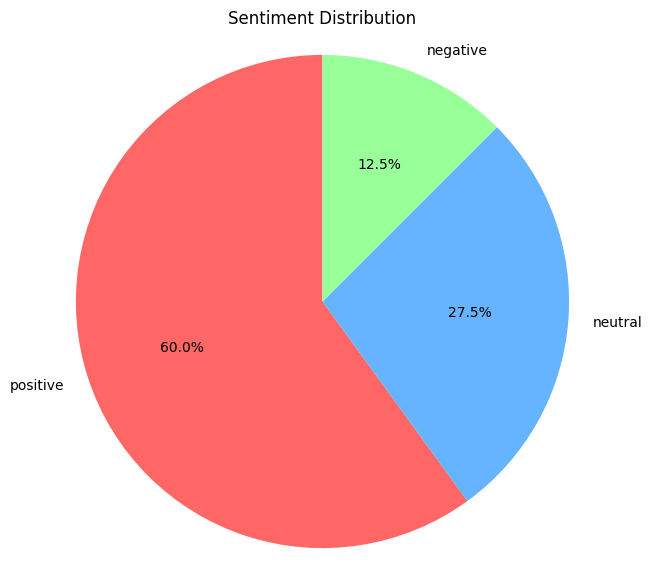

In [14]:
import matplotlib.pyplot as plt

sentiment_counts = dataset['sentiment'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution')
plt.axis('equal') 
plt.show()
